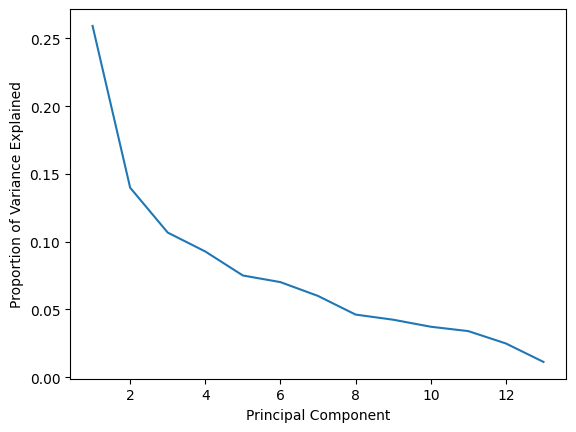

                                                   PC1       PC2       PC3  \
Reliance on Government Transfers             -0.369666 -0.250551  0.111393   
Uncollected Taxes                            -0.081687  0.232742  0.498331   
3 Year Change in Tax Base                     0.017505  0.251863 -0.197554   
Reliance on Single Business or Instituion    -0.127468 -0.396245  0.360908   
Residential Tax Effort                       -0.291030 -0.105348 -0.530549   
Total # of Deficits                          -0.171004 -0.141995  0.454624   
Total # of Budget Accuracy within + or - 5%  -0.145864  0.288790  0.095710   
Liquidity                                     0.359901 -0.259146 -0.042569   
Operating Reserve                             0.464030 -0.125917  0.091781   
Debt Service Cost                            -0.236677 -0.088853 -0.224371   
Outstanding Operating Debt                   -0.156734  0.449893  0.102232   
Undepreciated Assets                          0.228265  0.492429

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv('./datasets/Municipal_Fiscal_Statistics_-_Financial_Condition_Indicators.csv')

# Drop non-numeric columns
df = df.drop(['Region', 'Region Type', 'Year'], axis=1)
# Drop rows with missing values
df = df.dropna()
# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# Extract variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot scree plot
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# Extract loadings for each principal component
loadings = pca.components_

# Convert loadings to dataframe for easier visualization
loadings_df = pd.DataFrame(loadings.T, columns=['PC'+str(i) for i in range(1, len(loadings)+1)])
loadings_df.index = df.columns

# Print loadings for each principal component
print(loadings_df)
